Found 0.0 in 2024-05-30T23:55-dynamic_48_0_0.txt
Found 0.05 in 2024-05-31T00:16-dynamic_48_0_05.txt
Found 0.2 in 2024-05-31T00:36-dynamic_48_0_2.txt
Found 0.4 in 2024-05-31T00:57-dynamic_48_0_4.txt
Found 0.6 in 2024-05-31T01:18-dynamic_48_0_6.txt
Found 0.8 in 2024-05-31T01:39-dynamic_48_0_8.txt
Found 1.0 in 2024-05-31T01:59-dynamic_48_1_0.txt
Found 0.0 in 2024-05-31T02:20-dynamic_48_0_0.txt
Found 0.05 in 2024-05-31T02:41-dynamic_48_0_05.txt
Found 0.2 in 2024-05-31T03:02-dynamic_48_0_2.txt
Found 0.4 in 2024-05-31T03:22-dynamic_48_0_4.txt
Found 0.6 in 2024-05-31T03:43-dynamic_48_0_6.txt
Found 0.8 in 2024-05-31T04:04-dynamic_48_0_8.txt
Found 1.0 in 2024-05-31T04:25-dynamic_48_1_0.txt
Found 0.0 in 2024-05-31T04:45-dynamic_48_0_0.txt
Found 0.05 in 2024-05-31T05:06-dynamic_48_0_05.txt
Found 0.2 in 2024-05-31T05:26-dynamic_48_0_2.txt
Found 0.4 in 2024-05-31T05:47-dynamic_48_0_4.txt
Found 0.6 in 2024-05-31T06:08-dynamic_48_0_6.txt
Found 0.8 in 2024-05-31T06:29-dynamic_48_0_8.txt
Found 1.0 in 2

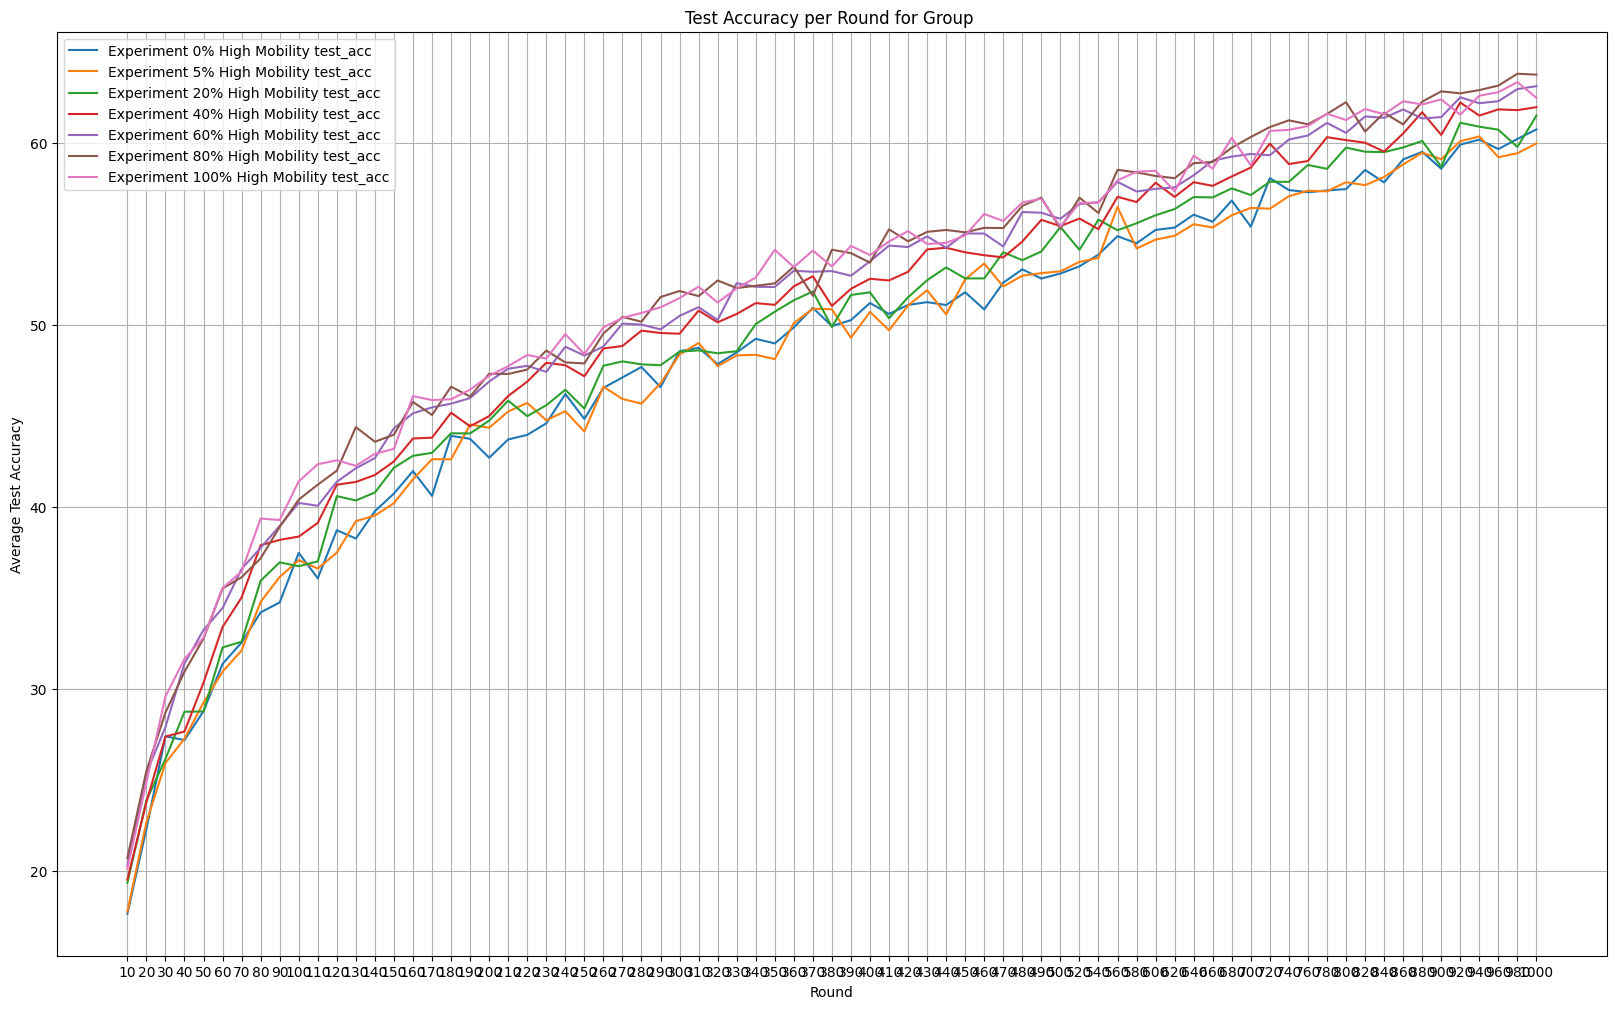

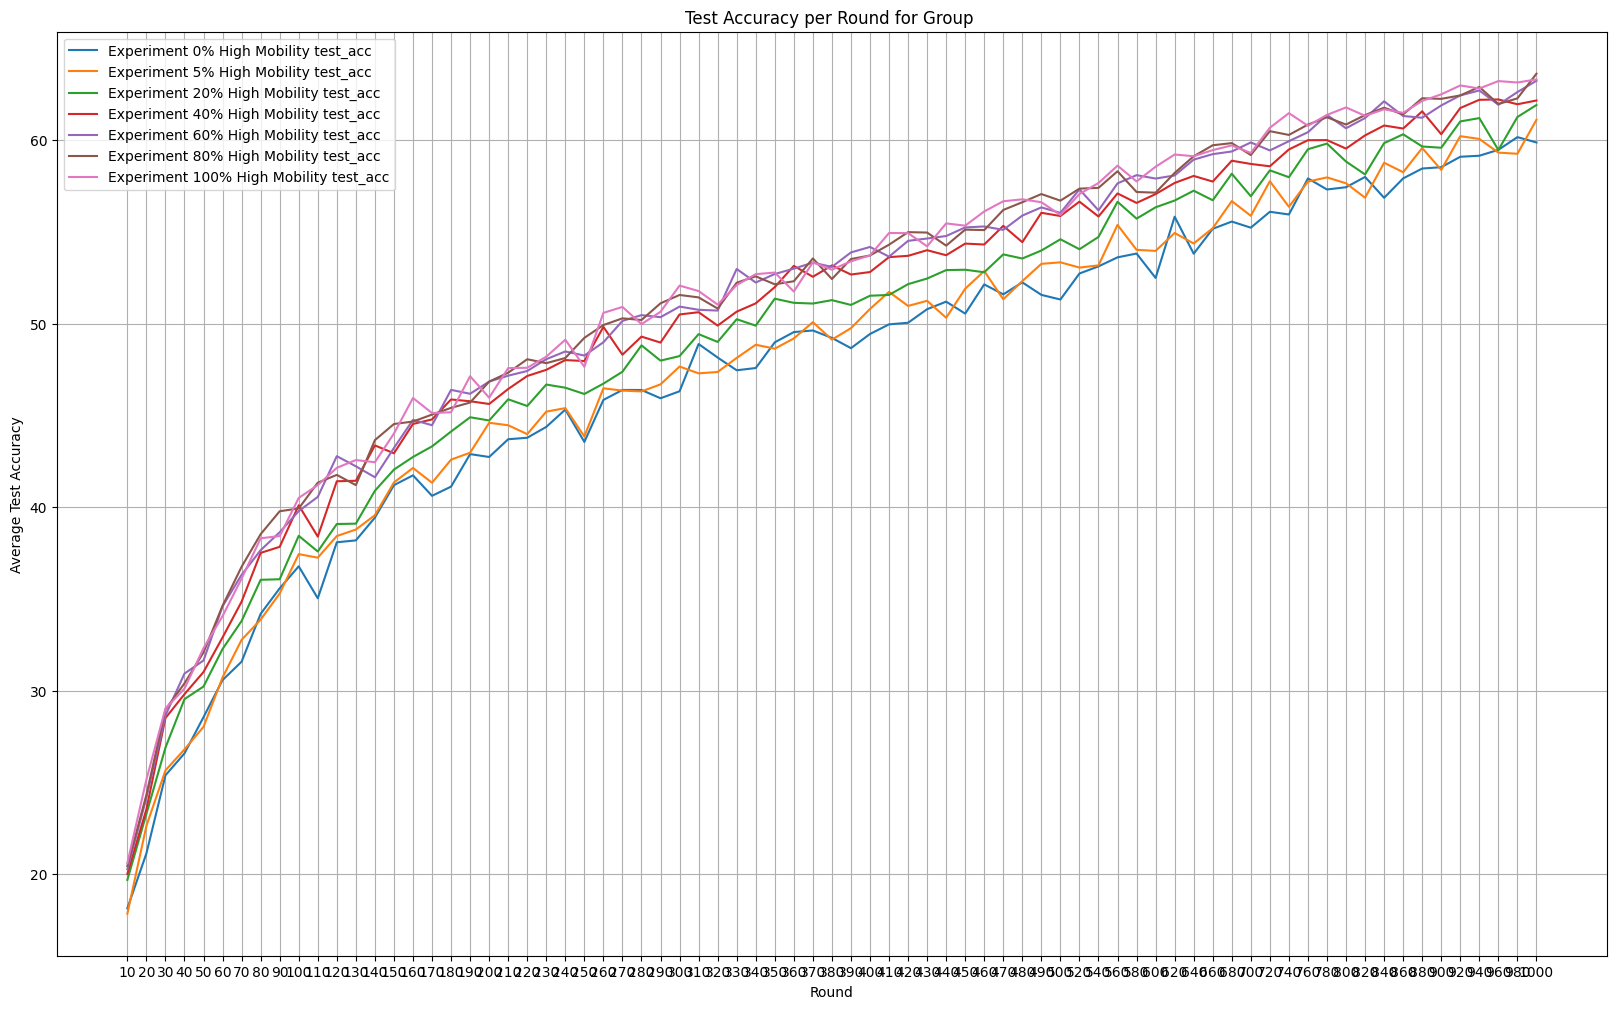

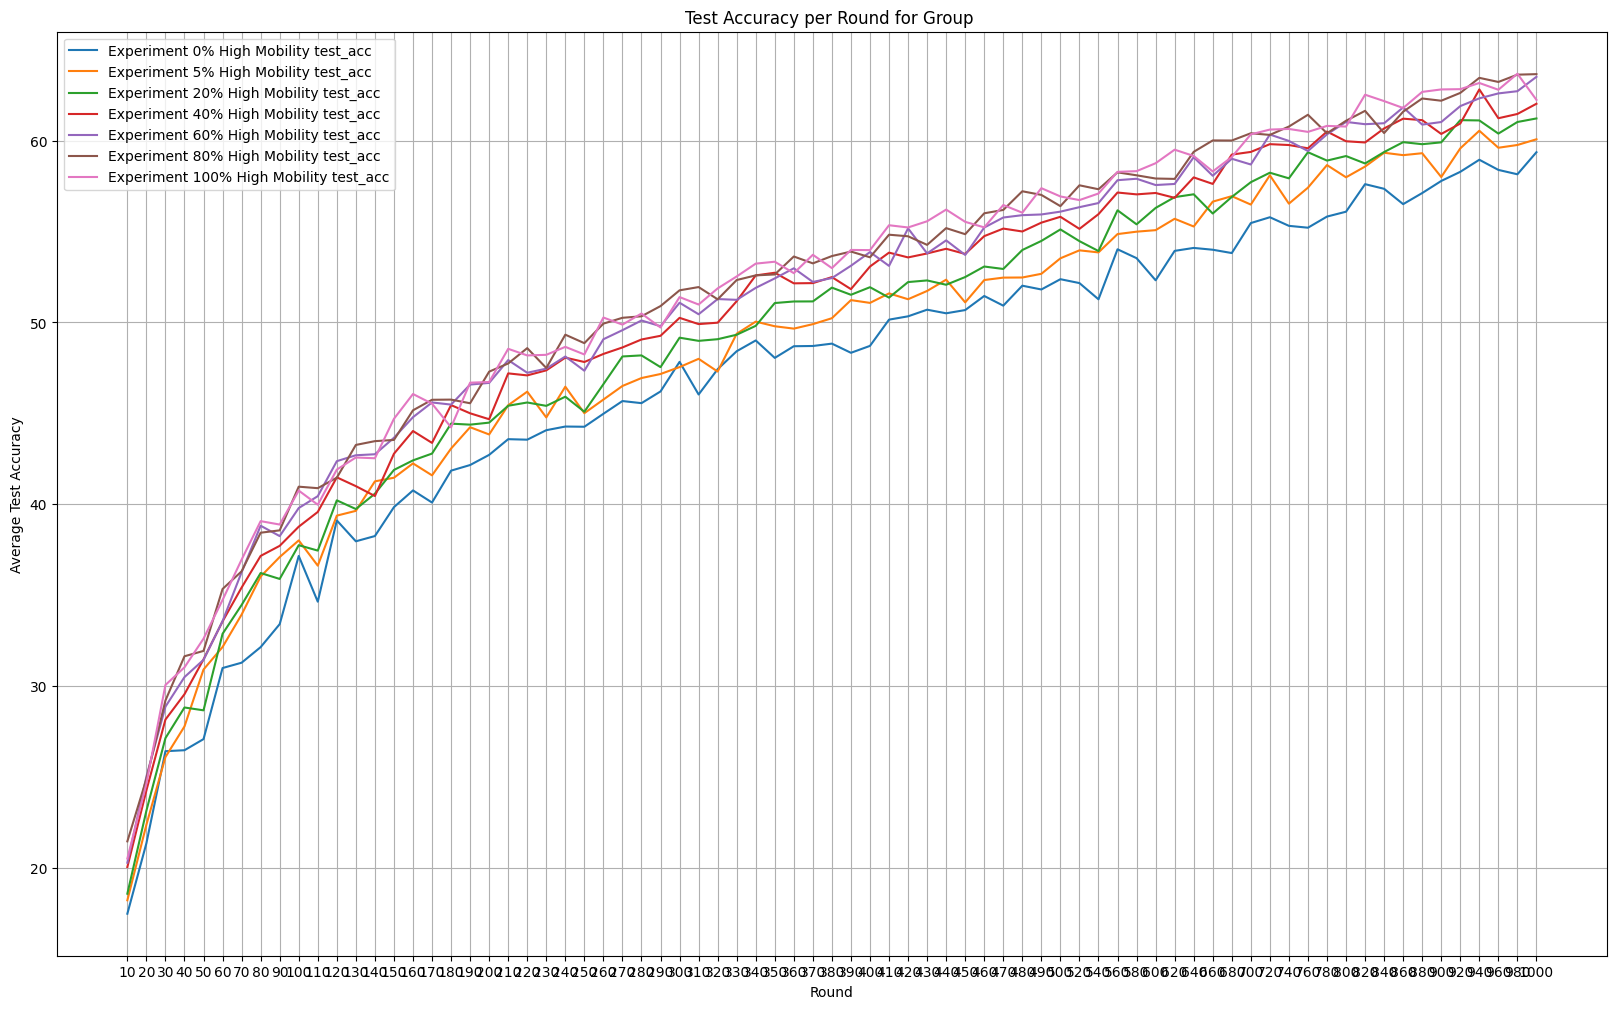

In [10]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt    
from collections import defaultdict


def average_of_first_percent(lst, p):
    n = int(len(lst) * p)
    return np.mean(lst[:n])

def average_of_last_percent(lst, p):
    n = int(len(lst) * p)
    return np.mean(lst[-n:])

def find_data_dir_with_mobility(base_dir: str, mobility: float):
    mobility_str = str(mobility).replace(".", "_") + ".txt"
    for dir in os.listdir(base_dir):
        if mobility_str in dir:
            print(f"Found {mobility} in {dir}")
            return os.path.join(base_dir, dir, "machine0")
    
    print(f"Could not find mobility {mobility} in {base_dir}")
    raise ValueError

def inf_dict():
    return defaultdict(inf_dict)

num_nodes = 48
experiment_groups ={
    1: ".saved_experiments/2024-05-30-new-neighbours-1",
    2: ".saved_experiments/2024-05-30-new-neighbours-2",
    3: ".saved_experiments/2024-05-30-new-neighbours-3",
}
experiments = {
    0.0: "0% High Mobility",
    0.05: "5% High Mobility",
    0.2: "20% High Mobility",
    0.4: "40% High Mobility",
    0.6: "60% High Mobility",
    0.8: "80% High Mobility",
    1.0: "100% High Mobility",
}
statistics = ["test_acc"]

def load_experiment_data(experiment_data, base_dir):
    for experiment, _ in experiments.items():
        experiment_data[experiment] = {}
        dir = find_data_dir_with_mobility(base_dir, experiment)
        for i in range(num_nodes):
            file_path = os.path.join(dir, f"{i}_results.json")
            if os.path.exists(file_path):
                with open(file_path, "r") as file:
                    content = json.load(file)

                    for statistic, rounds in content.items():
                        if statistic not in experiment_data[experiment]:
                            experiment_data[experiment][statistic] = {}

                        for round, value in rounds.items():
                            if round not in experiment_data[experiment][statistic]:
                                experiment_data[experiment][statistic][round] = []
                            experiment_data[experiment][statistic][round].append(value)

def compute_experiment_averages(experiment_data, statistics):
    averages = inf_dict()
    high_mobility_averages = inf_dict() 
    low_mobility_averages = inf_dict()
    for experiment in experiment_data:
        averages[experiment] = inf_dict()
        for statistic in statistics:
            for round, values in experiment_data[experiment][statistic].items():
                averages[experiment][statistic][round] = np.mean(values)

                if round == "10":
                    print(values)
                    print(len(values))

                high_mobility_proportion = experiment
                low_mobility_proportion = 1 - experiment
                high_mobility_averages[experiment][statistic][round] = average_of_first_percent(values, high_mobility_proportion)
                low_mobility_averages[experiment][statistic][round] = average_of_last_percent(values, low_mobility_proportion)
    return averages

def plot_averages(experiment_names, averages, experiment_group=""):
    plt.figure(figsize=(20, 12))

    for experiment, _ in averages.items():
        for statistic in statistics:
            rounds, acc_values = zip(*averages[experiment][statistic].items())
            plt.plot(rounds, acc_values, label=f"Experiment {experiment_names[experiment]} {statistic}")

    plt.xlabel("Round")
    plt.ylabel("Average Test Accuracy")
    plt.title(f"Test Accuracy per Round for Group {experiment_group}")
    plt.legend()
    plt.grid(True)
    plt.show()


grouped_experiments_data = inf_dict()
for experiment_group, dir in experiment_groups.items():
    experiment_data = grouped_experiments_data[experiment_group]
    load_experiment_data(experiment_data, dir)

grouped_averages = inf_dict()
for experiment_group, experiment_data in grouped_experiments_data.items():
    grouped_averages[experiment_group] = compute_experiment_averages(experiment_data, statistics)

for experiment_group, averages in grouped_averages.items():
    plot_averages(experiments, averages)


defaultdict(<function inf_dict at 0x147b0c7c0>, {0.0: defaultdict(<function inf_dict at 0x147b0c7c0>, {'test_acc': defaultdict(<function inf_dict at 0x147b0c7c0>, {'10': [17.672685185185188, 18.146990740740744, 17.48587962962963], '20': [22.32037037037037, 21.140509259259257, 21.36111111111111], '30': [27.415509259259256, 25.396296296296295, 26.423148148148147], '40': [27.206018518518515, 26.59212962962963, 26.47662037037037], '50': [28.795370370370375, 28.566203703703707, 27.087731481481484], '60': [31.39375, 30.588657407407407, 30.996064814814815], '70': [32.57013888888889, 31.58912037037037, 31.28888888888889], '80': [34.22291666666667, 34.19606481481481, 32.1462962962963], '90': [34.76435185185185, 35.586342592592594, 33.40949074074074], '100': [37.49143518518519, 36.78495370370371, 37.15949074074074], '110': [36.09236111111111, 35.04282407407407, 34.644444444444446], '120': [38.73148148148149, 38.094675925925934, 39.11342592592593], '130': [38.275231481481484, 38.19745370370371, 3

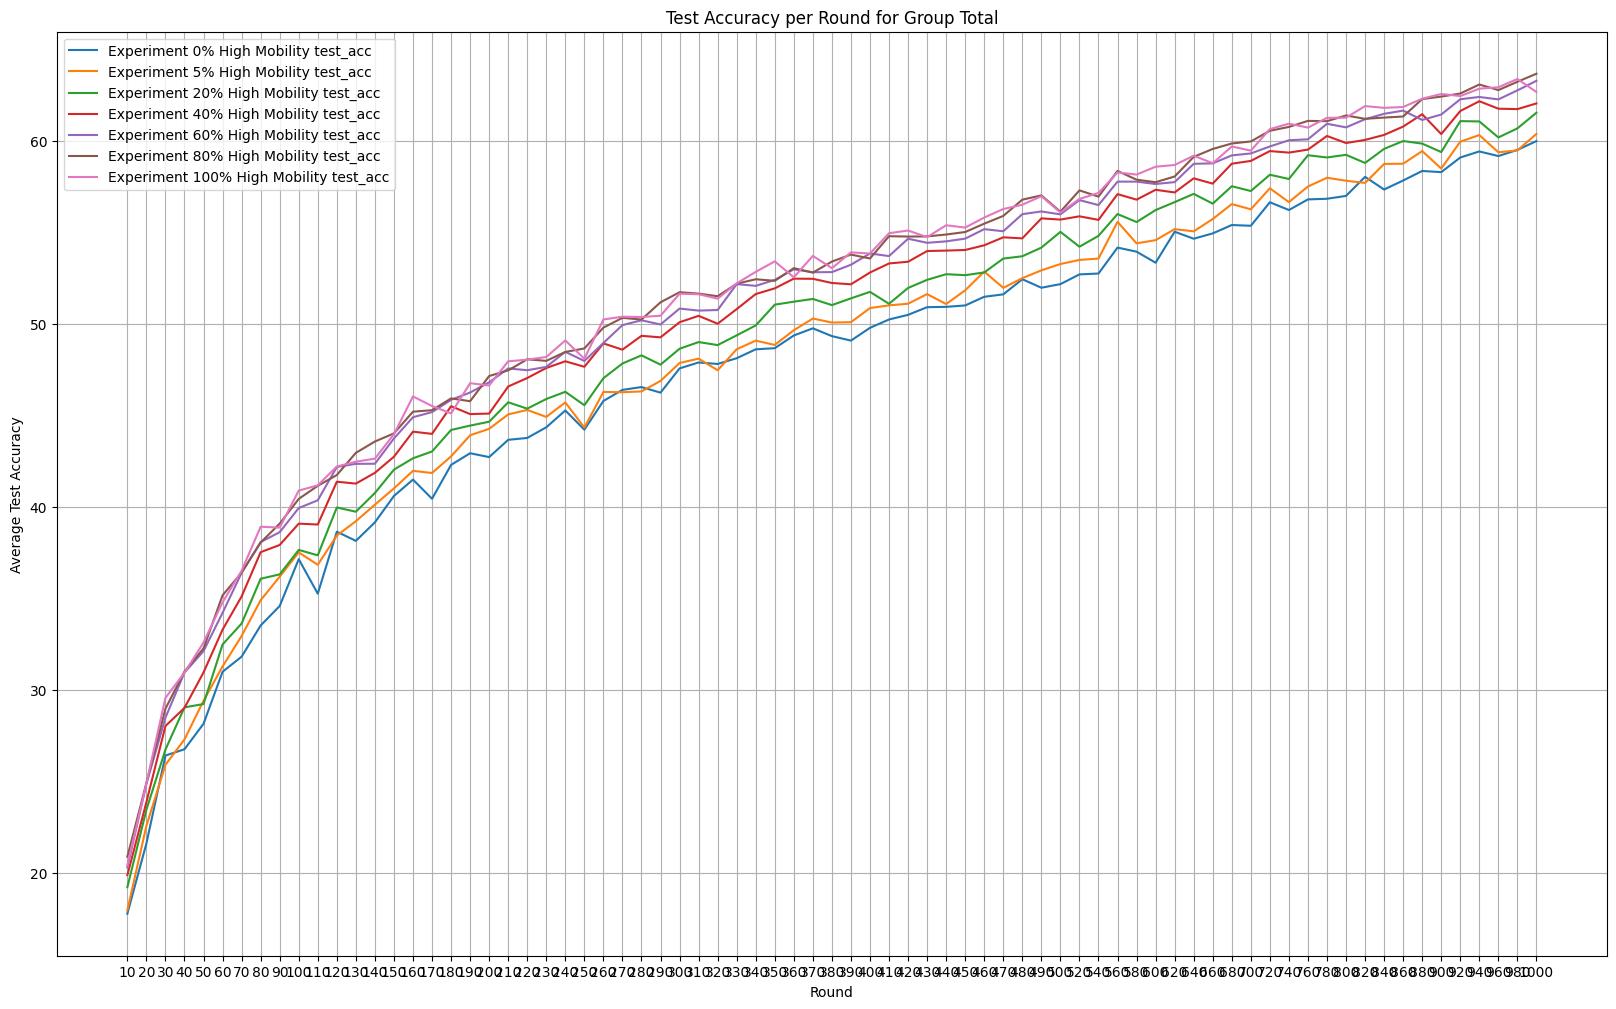

In [11]:
total_averages = inf_dict()

for experiment_group, averages in grouped_averages.items():
    for experiment, _ in averages.items():
        for statistic in statistics:
            for round, value in averages[experiment][statistic].items():
                if round not in total_averages[experiment][statistic]:
                    total_averages[experiment][statistic][round] = []
                total_averages[experiment][statistic][round].append(value)

print(total_averages)

for statistic in statistics:
    for experiment, _ in total_averages.items():
        for round, values in total_averages[experiment][statistic].items():
            total_averages[experiment][statistic][round] = np.mean(values)

plot_averages(experiments, total_averages, "Total")

In [12]:
plt.figure(figsize=(10, 6))

plot_averages(experiments, high_mobility_averages, 'high mobility clients')
plot_averages(experiments, low_mobility_averages, 'low mobility clients')

plt.xlabel("Round")
plt.ylabel("Average Test Accuracy")
plt.title("Test Accuracy per Round for Each Experiment")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'high_mobility_averages' is not defined

<Figure size 1000x600 with 0 Axes>